# Quantum phase transition in staggered Heisenberg Dimer

Here I wan't to examine how the quantum critical point affects the QPT at non-zero temperatures for the staggered Heisenberg dimer.

In [1]:
from stabilized_anisotropic_SSE import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
beta = 1.
Es_Eerrs = run_simulation_stabilized(24, 24, [1.], J2 = 0.2)
print("Energy per site ={E:.8f} at T={T:.3f}".format(E=Es_Eerrs[0,0], T=1./beta))

Building lattice
beta = 1.000
Energy per site =-0.19474420 at T=1.000


## QPT 
The quantum phase transition should be visible if we look at the staggered magnetization as a function of the coupling ratio.

## Energy per site vs temperature for different couplings 

Readjusting the simulation tool:

In [3]:
def run_simulation_stabilized(Lx, Ly, betas=[1.], n_updates_measure=10000, n_bins=10, J2 = 1):
    """A full simulation: initialize, thermalize and measure for various betas."""
    spins, op_string, bonds, bond_types = init_SSE_square(Lx, Ly)
    b1, b2 = bonds_resort(bonds, bond_types)
    bonds = np.concatenate((b1, b2), axis = 0)
    n_sites = len(spins)
    n_bonds = len(bonds)
    Es_Eerrs = []
    for beta in betas:
        print("beta = {beta:.3f}".format(beta=beta), flush=True)
        op_string = thermalize_stabilized(spins, op_string, bonds, beta, n_updates_measure//10, J2)
        Es = []
        for _ in range(n_bins):
            ns = measure_stabilized(spins, op_string, bonds, beta, n_updates_measure, J2)
            # energy per site
            E = (-np.mean(ns)/beta + 0.25*n_bonds) / n_sites
            Es.append(E)
        E, Eerr = np.mean(Es), np.std(Es)/np.sqrt(n_bins)
        Es_Eerrs.append((E, Eerr))
    return np.array(Es_Eerrs)

######################### L = 4 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
######################### L = 8 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
######################### L = 16 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta 

Text(0,0.5,'energy $E$ per site')

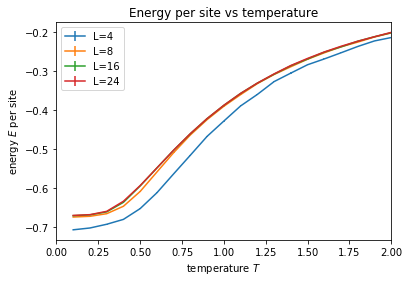

In [4]:
L_list = [4, 8, 16, 24]
T_list = np.linspace(2.0, 0., 20, endpoint = False)
betas = 1/T_list

Es = []
for L in L_list:
    print("#"*25 + " L = " + str(L) + " "+ "#"*25)
    E = run_simulation_stabilized(L, L, betas)
    Es.append(E)
    
plt.figure()
for E, L in zip(Es, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L=L))
plt.legend()
plt.title("Energy per site vs temperature")
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")

## J2 = 0.5

######################### L = 4 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
######################### L = 8 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
######################### L = 16 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta 

Text(0,0.5,'energy $E$ per site')

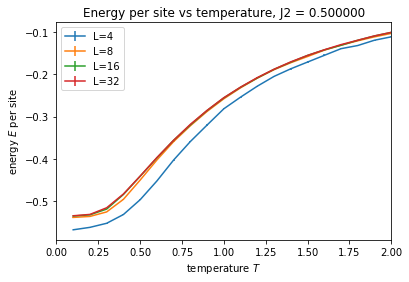

In [12]:
L_list = [4, 8, 16, 32]
T_list = np.linspace(2.0, 0., 20, endpoint = False)
betas = 1/T_list
J2 = 0.5

Es = []
for L in L_list:
    print("#"*25 + " L = " + str(L) + " "+ "#"*25)
    E = run_simulation_stabilized(L, L, betas, J2 = J2)
    Es.append(E)
    
plt.figure()
for E, L in zip(Es, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Energy per site vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")

Text(0,0.5,'energy $E$ per site')

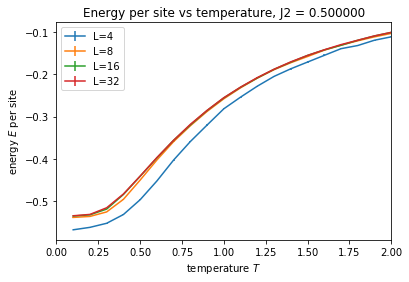

In [13]:
plt.figure()
for E, L in zip(Es, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Energy per site vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")

## Include heat capacity and stuff:

In [4]:
def get_staggering(Lx, Ly):
    stag = np.zeros(Lx*Ly, np.intp)
    for x in range(Lx):
        for y in range(Ly):
            s = site(x, y, Lx, Ly)
            stag[s] = (-1)**(x+y)
    return stag


def staggered_magnetization(spins, stag):
    return 0.5*np.sum(spins * stag)


def measure_stabilized(spins, op_string, bonds, stag, beta, n_updates_measure, J2):
    """Perform a lot of updates with measurements."""
    ns = []
    ms = []
    for _ in range(n_updates_measure):
        n = diagonal_update_stabilized(spins, op_string, bonds, beta, J2)
        m = staggered_magnetization(spins, stag)
        loop_update(spins, op_string, bonds)
        ns.append(n)
        ms.append(m)
    return np.array(ns), np.array(ms)

In [5]:
def run_simulation_stabilized(Lx, Ly, betas=[1.], n_updates_measure=10000, n_bins=10, J2 = 1):
    """A full simulation: initialize, thermalize and measure for various betas."""
    
    
    
    spins, op_string, bonds, bond_types = init_SSE_square(Lx, Ly)
    b1, b2 = bonds_resort(bonds, bond_types)
    bonds = np.concatenate((b1, b2), axis = 0)
    
    # Getting staggered magnetization
    stag = get_staggering(Lx, Ly)
    
    
    
    n_sites = len(spins)
    n_bonds = len(bonds)
    Es_Eerrs = []
    Cs_Cerrs = []
    Ms_Merrs = []
    for beta in betas:
        print("beta = {beta:.3f}".format(beta=beta), flush=True)
        op_string = thermalize_stabilized(spins, op_string, bonds, beta, n_updates_measure//10, J2)
        Es = []
        Cs = []
        Ms = []
        for _ in range(n_bins):
            ns, ms = measure_stabilized(spins, op_string, bonds, stag, beta, n_updates_measure, J2)
            # energy per site
            n_mean = np.mean(ns)
            E = (-n_mean/beta + 0.25*n_bonds) / n_sites
            Es.append(E)
            Cv = (np.mean(ns**2) - n_mean - n_mean**2)/ n_sites
            Cs.append(Cv)
            Ms.append(np.mean(np.abs(ms))/n_sites)  # note that we need the absolute value here!
            # there is a symmetry of flipping all spins which ensures that <Ms> = 0
        E, Eerr = np.mean(Es), np.std(Es)/np.sqrt(n_bins)
        Es_Eerrs.append((E, Eerr))
        C, Cerr = np.mean(Cs), np.std(Cs)/np.sqrt(n_bins)
        Cs_Cerrs.append((C, Cerr))
        M, Merr = np.mean(Ms), np.std(Ms)/np.sqrt(n_bins)
        Ms_Merrs.append((M, Merr))
    return np.array(Es_Eerrs), np.array(Cs_Cerrs), np.array(Ms_Merrs)

In [109]:
L_list = [4, 8, 16, 32]
T_list = np.linspace(2.0, 0., 20, endpoint = False)
betas = 1/T_list
J2 = 2.7

Es = []
Cs = []
Ms = []

for L in L_list:
    print("#"*25 + " L = " + str(L) + " "+ "#"*25)
    E, C, M = run_simulation_stabilized(L, L, betas, J2 = J2)
    Es.append(E)
    Cs.append(C)
    Ms.append(M)


######################### L = 4 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
######################### L = 8 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000
######################### L = 16 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta 

In [6]:
plt.figure()
for E, L in zip(Es, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Energy per site vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")

plt.figure()
for E, L in zip(Cs, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Heat capacity vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")


plt.figure()
for E, L in zip(Ms, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Stagnant magnetization vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")


NameError: name 'Es' is not defined

<Figure size 432x288 with 0 Axes>

# Other side of QPT

J2 under the critical value

In [104]:
L_list = [4, 8, 16, 32]
T_list = np.linspace(2.0, 0., 20, endpoint = False)
betas = 1/T_list
J2 = 2.7

Es_02 = []
Cs_02 = []
Ms_02 = []

for L in L_list:
    print("#"*25 + " L = " + str(L) + " "+ "#"*25)
    E, C, M = run_simulation_stabilized(L, L, betas, J2 = J2)
    Es_02.append(E)
    Cs_02.append(C)
    Ms_02.append(M)

######################### L = 4 #########################
Building lattice
beta = 0.500
beta = 0.526
beta = 0.556
beta = 0.588
beta = 0.625
beta = 0.667
beta = 0.714
beta = 0.769
beta = 0.833
beta = 0.909
beta = 1.000
beta = 1.111
beta = 1.250
beta = 1.429
beta = 1.667
beta = 2.000
beta = 2.500
beta = 3.333
beta = 5.000
beta = 10.000


ValueError: too many values to unpack (expected 3)

Text(0,0.5,'energy $E$ per site')

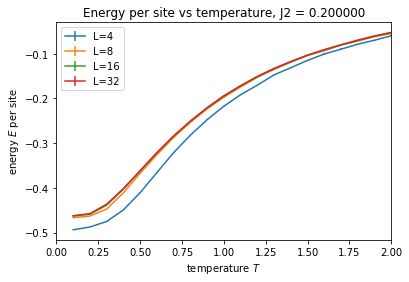

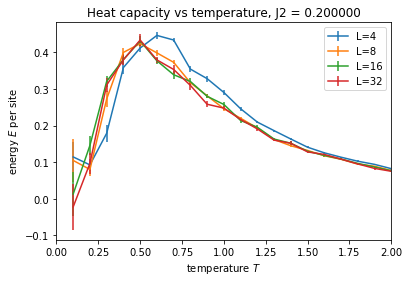

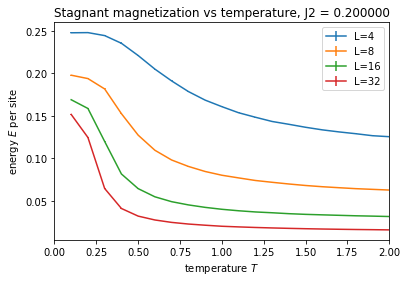

In [31]:
plt.figure()
for E, L in zip(Es_02, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Energy per site vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")

plt.figure()
for E, L in zip(Cs_02, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Heat capacity vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")


plt.figure()
for E, L in zip(Ms_02, L_list):
    plt.errorbar(T_list, E[:, 0], yerr=E[:, 1], label="L={L:d}".format(L = L))
plt.legend()
plt.title("Stagnant magnetization vs temperature, J2 = {J2:f}".format(J2 = J2))
plt.xlim(0, np.max(1./betas))
plt.xlabel("temperature $T$")
plt.ylabel("energy $E$ per site")

# Critical coupling

In [9]:
def run_simulation_stabilized(Lx, Ly, betas=[1.], n_updates_measure=10000, n_bins=10, J2 = 1):
    """A full simulation: initialize, thermalize and measure for various betas."""
    
    
    
    spins, op_string, bonds, bond_types = init_SSE_square(Lx, Ly)
    b1, b2 = bonds_resort(bonds, bond_types)
    bonds = np.concatenate((b1, b2), axis = 0)
    
    # Getting staggered magnetization
    stag = get_staggering(Lx, Ly)
    
    
    
    n_sites = len(spins)
    n_bonds = len(bonds)
    Es_Eerrs = []
    Cs_Cerrs = []
    Ms_Merrs = []
    Bs_Eerrs = []
    for beta in betas:
        print("beta = {beta:.3f}".format(beta=beta), flush=True)
        op_string = thermalize_stabilized(spins, op_string, bonds, beta, n_updates_measure//10, J2)
        Es = []
        Cs = []
        Ms = []
        Ms2 = []
        Ms4 = []
        for _ in range(n_bins):
            ns, ms = measure_stabilized(spins, op_string, bonds, stag, beta, n_updates_measure, J2)
            # energy per site
            n_mean = np.mean(ns)
            E = (-n_mean/beta + 0.25*n_bonds) / n_sites
            Es.append(E)
            Cv = (np.mean(ns**2) - n_mean - n_mean**2)/ n_sites
            Cs.append(Cv)
            Ms.append(np.mean(np.abs(ms))/n_sites)  # note that we need the absolute value here!
            
            Ms2.append(np.mean(np.abs(ms)**2)/n_sites**2)
            Ms4.append(np.mean(np.abs(ms)**4)/n_sites**4)
            # there is a symmetry of flipping all spins which ensures that <Ms> = 0
        E, Eerr = np.mean(Es), np.std(Es)/np.sqrt(n_bins)
        Es_Eerrs.append((E, Eerr))
        C, Cerr = np.mean(Cs), np.std(Cs)/np.sqrt(n_bins)
        Cs_Cerrs.append((C, Cerr))
        M, Merr = np.mean(Ms), np.std(Ms)/np.sqrt(n_bins)
        Ms_Merrs.append((M, Merr))
        
        # Binder Cummulant
        Ms2 = np.array(Ms2)
        Ms4 = np.array(Ms4)
        B, Berr = 3/2*1.5*(1 - np.mean(Ms4)/(3*np.mean(Ms2)**2)), np.std(3/2*1.5*(1 - Ms4/(3*(Ms2)**2))) 
        Bs_Eerrs.append((B, Berr))
        
    return np.array(Es_Eerrs), np.array(Cs_Cerrs), np.array(Ms_Merrs), np.array(Bs_Eerrs)

In [13]:
def save_data(filename, data):
    """Save an (almost) arbitrary python object to disc."""
    with open(filename, 'wb') as f:
        pickle.dump(data, f)


L_list = [4, 8, 12, 16, 20, 24, 32, 40, 64]
# L_list = [4, 8, 16]
# T_list = np.linspace(2.0, 0., 20, endpoint = False)
# betas = 1/T_list
Js = np.linspace(2.45, 2.55, 8)


Bs = {}
Ms = {}
Cs = {}
Es = {}


for i in range(len(L_list)):
    L = L_list[i]
    Bs[L] = []
    Ms[L] = []
    Cs[L] = []
    Es[L] = []
    print("Now simulating L = {L:d}".format(L = L))
    for j in range(len(Js)):
        J = Js[j]
        print(J)
        beta = [L] # This is where we need to look
        E, C, M, B = run_simulation_stabilized(L, L, beta, J2 = J)
        Bs[L].append(B) 
        Ms[L].append(M)
        Cs[L].append(C)
        Es[L].append(E)
save_data("binder_full.txt", Bs, Ms, Cs, Es)

"""
Es_02 = []
Cs_02 = []
Ms_02 = []
Bs_02 = []

for L in L_list:
    print("#"*25 + " L = " + str(L) + " "+ "#"*25)
    E, C, M, B = run_simulation_stabilized(L, L, betas, J2 = J2)
    Es_02.append(E)
    Cs_02.append(C)
    Ms_02.append(M)
    
"""

Now simulating L = 4
2.45
Building lattice
beta = 4.000
2.4642857142857144
Building lattice
beta = 4.000
2.4785714285714286
Building lattice
beta = 4.000
2.492857142857143
Building lattice
beta = 4.000
2.507142857142857
Building lattice
beta = 4.000
2.5214285714285714
Building lattice
beta = 4.000
2.5357142857142856
Building lattice
beta = 4.000
2.55
Building lattice
beta = 4.000
Now simulating L = 8
2.45
Building lattice
beta = 8.000
2.4642857142857144
Building lattice
beta = 8.000
2.4785714285714286
Building lattice
beta = 8.000
2.492857142857143
Building lattice
beta = 8.000
2.507142857142857
Building lattice
beta = 8.000
2.5214285714285714
Building lattice
beta = 8.000
2.5357142857142856
Building lattice
beta = 8.000
2.55
Building lattice
beta = 8.000
Now simulating L = 12
2.45
Building lattice
beta = 12.000
2.4642857142857144
Building lattice
beta = 12.000
2.4785714285714286
Building lattice
beta = 12.000
2.492857142857143
Building lattice
beta = 12.000
2.507142857142857
Building 

TypeError: save_data() takes 2 positional arguments but 5 were given

Text(0,0.5,'$C_V$')

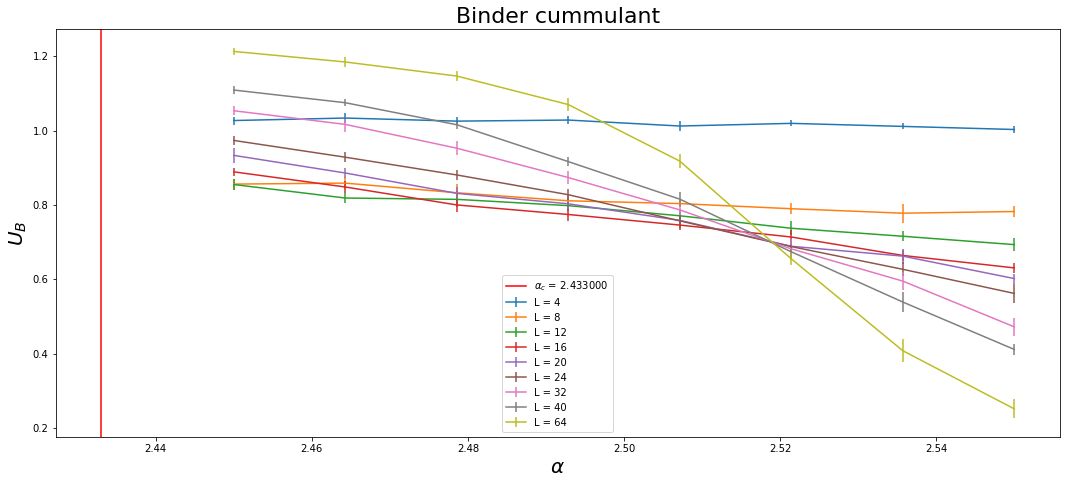

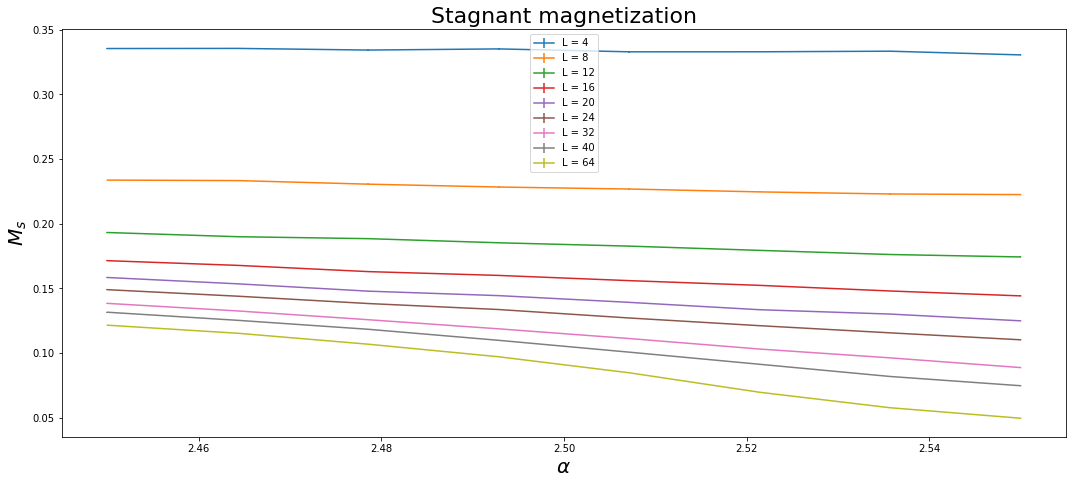

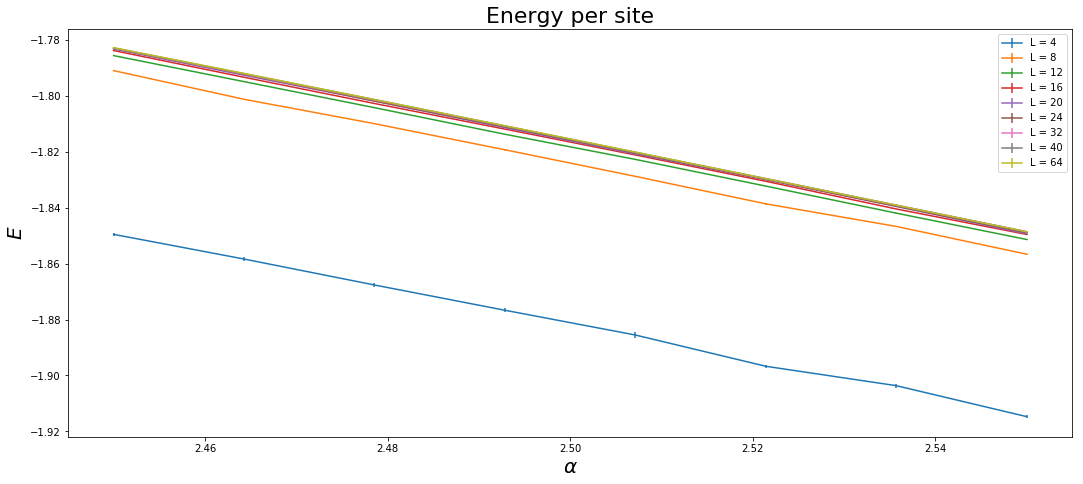

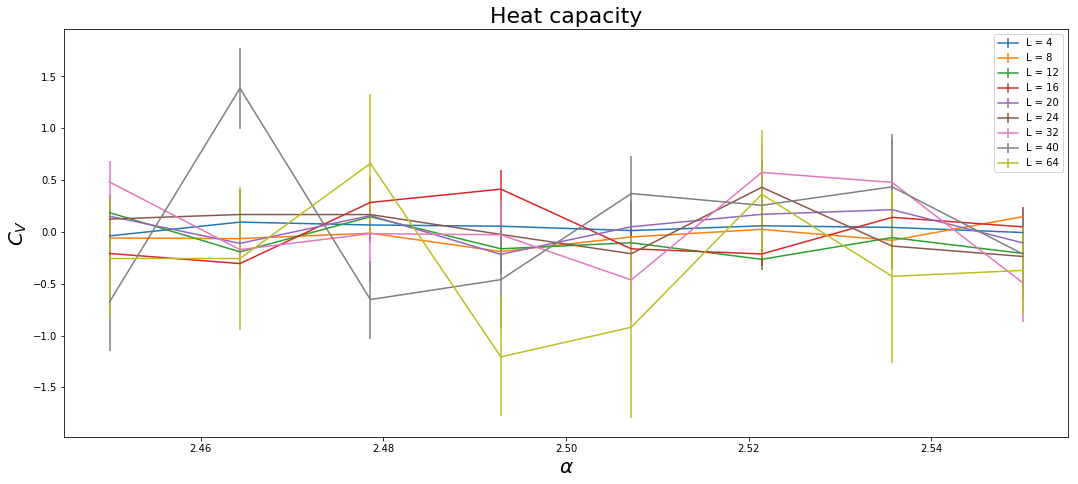

In [14]:
import matplotlib.pyplot as plt
size = Bs.keys()
plt.figure(figsize = (3*12/2,3*5/2))
plt.rc('text', usetex=False)
for size in Bs.keys():
    plt.errorbar(Js, 3/2*np.array(Bs[size])[:,0][:,0], np.array(Bs[size])[:,0][:,1], label = "L = {L:d}".format(L = size))

plt.axvline(2.433, color = 'r', label = r"$\alpha_c$ = {a:f}".format(a = 2.433))
# plt.xlim([2.4, 2.51])
plt.legend()
plt.title("Binder cummulant", fontsize = 22)
plt.xlabel(r"$\alpha$", fontsize = 20)
plt.ylabel(r"$U_B$", fontsize = 20)



plt.figure(figsize = (3*12/2,3*5/2))
plt.rc('text', usetex=False)
for size in Bs.keys():
    plt.errorbar(Js, 3/2*np.array(Ms[size])[:,0][:,0], np.array(Ms[size])[:,0][:,1], label = "L = {L:d}".format(L = size))

# plt.axvline(2.433, color = 'r', label = r"$\alpha_c$ = {a:f}".format(a = 2.433))
# plt.xlim([2.4, 2.51])
plt.legend()
plt.title("Stagnant magnetization", fontsize = 22)
plt.xlabel(r"$\alpha$", fontsize = 20)
plt.ylabel(r"$M_s$", fontsize = 20)


plt.figure(figsize = (3*12/2,3*5/2))
plt.rc('text', usetex=False)
for size in Bs.keys():
    plt.errorbar(Js, 3/2*np.array(Es[size])[:,0][:,0], np.array(Es[size])[:,0][:,1], label = "L = {L:d}".format(L = size))

# plt.axvline(2.433, color = 'r', label = r"$\alpha_c$ = {a:f}".format(a = 2.433))
# plt.xlim([2.4, 2.51])
plt.legend()
plt.title("Energy per site", fontsize = 22)
plt.xlabel(r"$\alpha$", fontsize = 20)
plt.ylabel(r"$E$", fontsize = 20)


plt.figure(figsize = (3*12/2,3*5/2))
plt.rc('text', usetex=False)
for size in Bs.keys():
    plt.errorbar(Js, 3/2*np.array(Cs[size])[:,0][:,0], np.array(Cs[size])[:,0][:,1], label = "L = {L:d}".format(L = size))

# plt.axvline(2.433, color = 'r', label = r"$\alpha_c$ = {a:f}".format(a = 2.433))
# plt.xlim([2.4, 2.51])
plt.legend()
plt.title("Heat capacity", fontsize = 22)
plt.xlabel(r"$\alpha$", fontsize = 20)
plt.ylabel(r"$C_V$", fontsize = 20)

In [81]:
A = np.array(Bs[8])

In [83]:
A[:,0][:,0]

array([-186.84920696, -185.57928014, -186.14539879, -185.86580493,
       -185.15662049, -185.72338118, -184.56313721, -184.13792713,
       -185.03806894, -184.60899685])

Victory bitches! :D :D :D :D :

In [148]:
import pickle

In [8]:
def save_data(filename, data):
    """Save an (almost) arbitrary python object to disc."""
    with open(filename, 'wb') as f:
        pickle.dump(data, f)


In [178]:
# save_data("binder_4_8_16.txt", Bs)
# save_data("binder_4_8_16_32.txt", Bs)

# Attempting to extract universality class

In [1]:
nu_s = np.linspace(0.7, 0.707, 3)
J_c = 2.51

rescaled_J = (Js - J_c)/J_c
for nu in nu_s:
    plt.figure()
    for size in Bs.keys():
        L = size
        rescaled_J = ((Js - J_c)/J_c)*(L**(1/nu))
        # plt.axvline(0, color = 'k')
        # plt.xlim([-1,1])
        plt.ylim([0.5, 0.7])
        plt.title(str(nu))
        plt.errorbar(rescaled_J, 3/2*np.array(Bs[size])[:,0][:,0], np.array(Bs[size])[:,0][:,1], label = "L = {L:d}".format(L = size))

NameError: name 'np' is not defined

In [193]:
rescaled_J

array([-617595.31771476, -521821.83276248, -426048.3478102 ,
       -330274.86285793, -234501.37790565, -138727.89295337,
        -42954.4080011 ,   52819.07695118,  148592.56190346,
        244366.04685573])

In [196]:
(Js - J_c)/J_c

array([-0.58898479, -0.49764808, -0.40631137, -0.31497465, -0.22363794,
       -0.13230123, -0.04096452,  0.0503722 ,  0.14170891,  0.23304562])

In [11]:
save_data("binder_4_8_16_32_64.txt", Bs)

In [16]:
import pickle

In [20]:
def save_data(filename, data):
    """Save an (almost) arbitrary python object to disc."""
    with open(filename, 'wb') as f:
        pickle.dump(data, f)
        
        
save_data("binder_full.txt", Bs)
save_data("magnetization_full.txt", Ms)
save_data("heat_capacity_full.txt", Cs)
save_data("Energy_per_site.txt", Es)

I get a critical exponent of around 0.7! 